In [60]:
##- Using the USA_housing.csvDownload USA_housing.csv dataset:

   ##        - build a linear regression model to predict the housing price and measure the model performances on both the 
##training and test sets using R^2, RMSE, MAE, and Adjusted R^2.

          ## - Based, on the model's results,
    ##does the model overfit or underfit? If yes,
    ###devise an approach to improve the model? Also, interpret the coefficients of the model
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import MinMaxScaler,StandardScaler




ImportError: cannot import name 'StandardScalar' from 'sklearn.preprocessing' (C:\Users\14093\Downloads\Anaconda38\lib\site-packages\sklearn\preprocessing\__init__.py)

In [23]:

# loading the dataset
path = r"C:\Users\14093\Downloads\USA_Housing-1.csv"
house = pd.read_csv(path)
house.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [24]:
# Explore the data

house.sample(5, random_state=0)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
398,61200.726175,5.299694,6.234615,4.23,42789.692217,894251.068636,"45153 Salas Hollow Apt. 148\nWest Erica, SD 93725"
3833,63380.814670,5.344664,6.001574,2.45,40217.333577,932979.360621,"3499 Stuart Plains Suite 304\nAaronhaven, NE 8..."
4836,71208.269301,5.300326,6.077989,4.01,25696.361741,920747.911288,"796 Joshua Forges Suite 834\nBensonside, CA 82761"
4572,50343.763518,6.027468,5.160240,4.35,27445.876739,691854.921027,"400 Allen Lodge Apt. 145\nBernardfort, NV 57316"
636,54535.453719,5.278065,6.871038,4.41,30852.207006,732733.236293,146 Christopher Lights Suite 182\nNew Kathysid...


In [25]:

### LET CHECK FOR MISSING VALUE

house.isnull().sum()
    

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [26]:
### Checking for duplicate value

house.duplicated().sum()





0

In [27]:
# let's create a copy of the data

df = house.copy()

# checking column datatypes and number of non-null values

df.info()


## Observation 

## Data set is clean, Address column is the only object variable while other columns are float,
### our target variable is price which have to be drop

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [28]:
# Let's look at the statistical summary of the data
df.describe(include="all").T

#The number of Avg. Area Income varies from 17796.63119 to 107701.748378.
#The Area Population  range from 172.610686 to 69621.713378 
#The house Price range  from 15938.657923  to 2469065.594175, while the mean house price is 1232072.654142.
#There are no missing values in the data.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Avg. Area Income,5000.0,NaN,NaN,NaN,68583.108984,10657.991214,17796.63119,61480.562388,68804.286404,75783.338666,107701.748378
Avg. Area House Age,5000.0,NaN,NaN,NaN,5.977222,0.991456,2.644304,5.322283,5.970429,6.650808,9.519088
Avg. Area Number of Rooms,5000.0,NaN,NaN,NaN,6.987792,1.005833,3.236194,6.29925,7.002902,7.665871,10.759588
Avg. Area Number of Bedrooms,5000.0,NaN,NaN,NaN,3.98133,1.234137,2.0,3.14,4.05,4.49,6.5
Area Population,5000.0,NaN,NaN,NaN,36163.516039,9925.650114,172.610686,29403.928702,36199.406689,42861.290769,69621.713378
Price,5000.0,NaN,NaN,NaN,1232072.654142,353117.626581,15938.657923,997577.135049,1232669.377966,1471210.204212,2469065.594175
Address,5000,5000,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
##EDA
#Bivariate Analysis
#Here, we will use our utility functions for visualization

from utils import histogram_boxplot, labeled_barplot

histogram_boxplot(df, "Price")

ModuleNotFoundError: No module named 'utility'

In [41]:
corr_cols = [item for item in df.columns if "Address" not in item ]

cor_matt = df[corr_cols].corr()

cor_matt

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<AxesSubplot:>

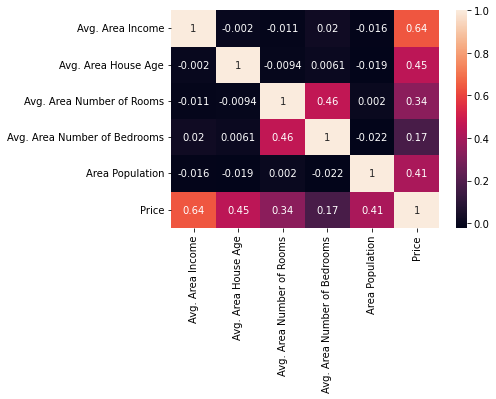

In [42]:
sns.heatmap(data = corr_matt , annot = True)

# To some extent there's correlation between Average Area income and house price

In [49]:
### Selecting the features needed to building the models 

x = df.drop(["Price","Address"], axis = 1)

y = df["Price"]

x

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [50]:
#### Spliting the data into training and testing set
### import the function to split the data set

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test =train_test_split(x,y,test_size =0.3, random_state = 0)

# Checking the dimension of train and test data

x_train.shape

(3500, 5)

In [62]:
# Normalizing Or Standardizing the training and test data

from sklearn.preprocessing import MinMaxScaler,StandardScaler

Scaler = StandardScaler()

x_train_sd = Scaler.fit_transform(x_train)

x_test_sd = Scaler.transform(x_test)

x_train_sd

array([[ 0.8820858 ,  0.47493768,  0.2135076 ,  1.21581933, -0.66175338],
       [ 0.12942398,  0.13034685, -1.78149272, -1.35902999,  1.60971646],
       [-0.25461195, -0.38555165, -0.48271322, -1.52906721,  1.22206855],
       ...,
       [-0.13697301, -0.62780257,  0.39293187,  0.17940199, -0.62510121],
       [-1.50340373, -1.09210704,  0.24531038, -0.61410503,  0.51332171],
       [ 1.70980244,  0.56393867, -1.85245555, -1.51287319,  1.16850024]])

In [64]:
#### Fitting the linear Regression Model by import the linear Regression algorithm

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train_sd,y_train)

LinearRegression()

LinearRegression()

In [65]:
lr.coef_

array([230245.72500496, 165031.99098952, 122210.06746546,   2173.68843825,
       149669.76854912])

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

model_performance_regression(lr,x_train_sd,y_train)



,RMSE,MAE,R-squared,Adj. R-squared
0,100848.566455,81265.307291,0.917071,0.916952


In [71]:
model_performance_regression(lr,x_test_sd,y_test)

,RMSE,MAE,R-squared,Adj. R-squared
0,101672.699523,81563.14734,0.920076,0.919808


In [ ]:
##### THE MODEL PERFORM BOTH ON THE DATA TRAINING  AND DATA TESTING THEREFORE FEATURES SELECTION OR REGULIZATION IS REQUIRED.